# Import Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import shapiro, kstest, normaltest, skew, zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.express as px

import statsmodels.api as sm

import pickle

import json

# Promblem Statement

In [2]:
#To predict how much chargers apply by using given features

# Data Gathering

In [3]:
df_md = pd.read_csv(r'D:\DataScience\PythonProgram\Data_sets\medical_insurance.csv')
df_md

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [4]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_md.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_md['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [7]:
df_md['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [8]:
df_md.shape[1]

7

In [9]:
for i in df_md.columns:
    print('Column Name :',i)
    print(df_md[i].value_counts())
    print('*'*60)

Column Name : age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
************************************************************
Column Name : sex
male      676
female    662
Name: sex, dtype: int64
************************************************************
Column Name : bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
************************************************************
Column Name : children
0    574
1    324
2    240
3    157
4     25
5     18
Name: c

In [10]:
df_md['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [11]:
df_md['sex'].replace({'male': 0, 'female': 1},inplace= True)     #Converting sex column object data type into numeric data type
df_md

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [12]:
df_md['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [13]:
df_md['smoker'].replace({'no': 0, 'yes': 1}, inplace= True)   #Converting Smoker column object data type into numeric data type
df_md

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [14]:
df_md = pd.get_dummies(df_md, columns= ['region'])         #Converting Region column object data type into numeric data type
df_md

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [15]:
df_md.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Linearity

In [16]:
df_md.corr()      #Checking correlation between dependent and independent variables

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

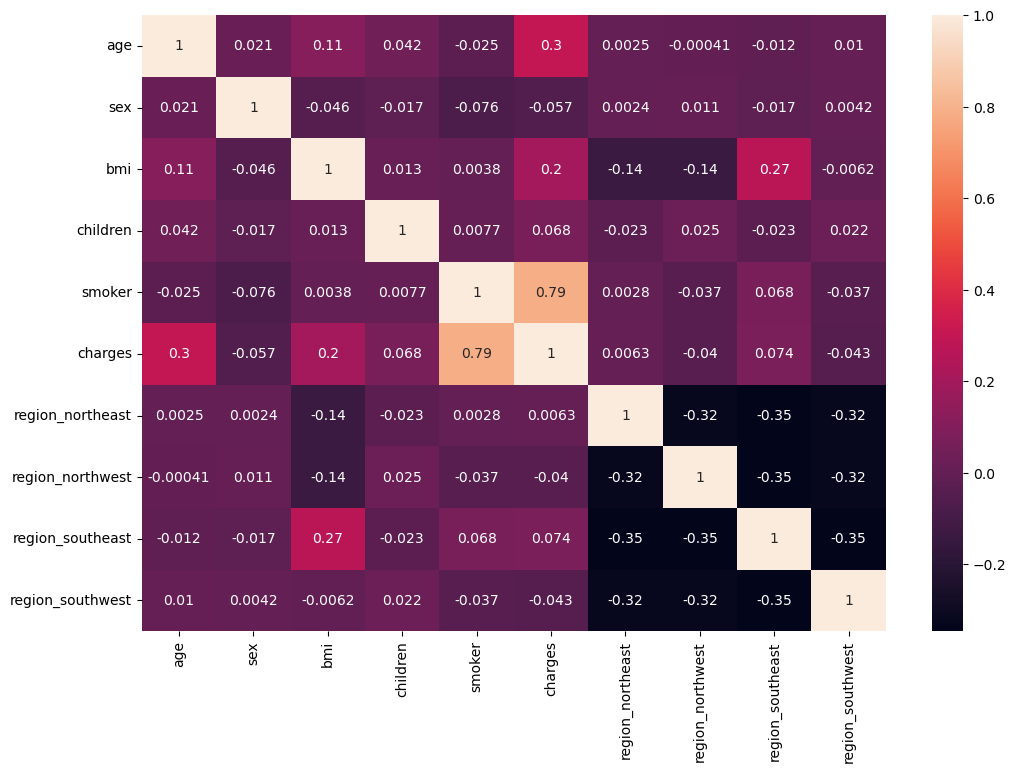

In [17]:
plt.figure(figsize= (12,8))
sns.heatmap(df_md.corr(), annot= True)   #Ploting heatmap of corelation of dependent and independet variables

<Axes: xlabel='age', ylabel='Density'>

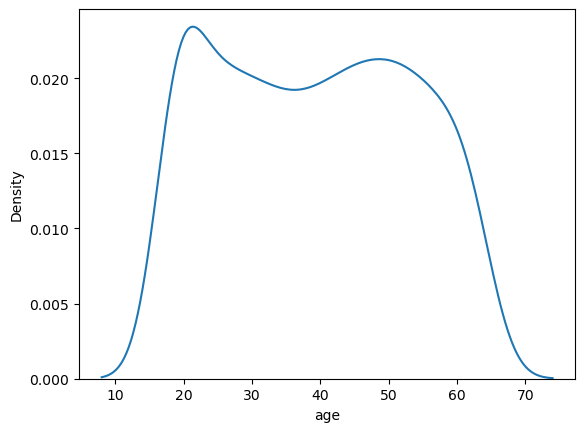

In [18]:
sns.kdeplot(df_md['age'])         #Checking normal distirbution of age column

<Axes: xlabel='age'>

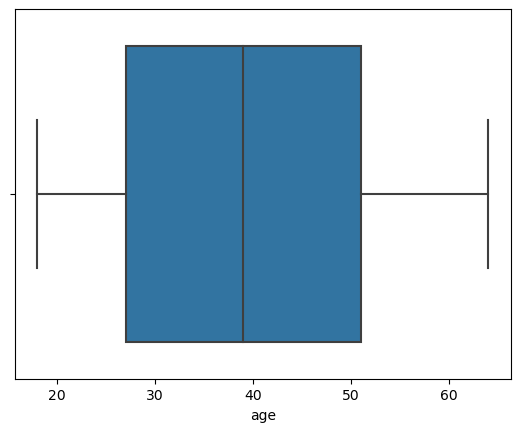

In [19]:
sns.boxplot(x = df_md['age'])    #Checking outliers using boxplot

In [20]:
skew(df_md['age'])

0.055610083072599126

<Axes: xlabel='bmi', ylabel='Density'>

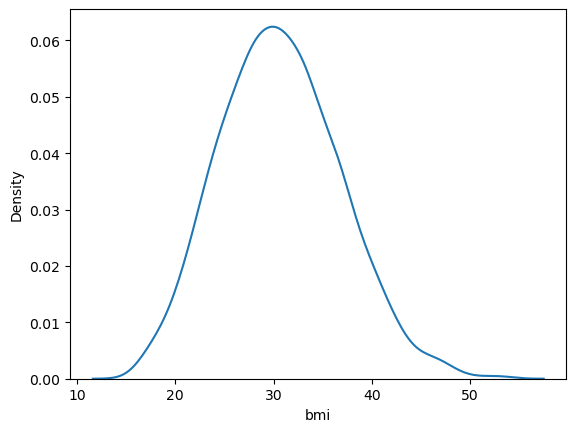

In [21]:
sns.kdeplot(df_md['bmi'])

<Axes: xlabel='bmi'>

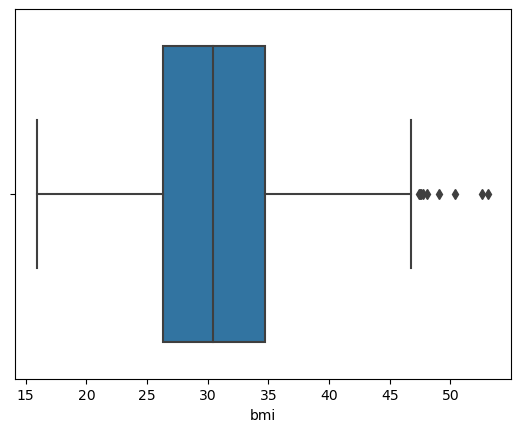

In [22]:
sns.boxplot(x= df_md['bmi'])

In [23]:
skew(df_md['bmi'])

0.28372857291709386

In [24]:
q3 = df_md['bmi'].quantile(0.75)
q1 = df_md['bmi'].quantile(0.25)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print('Q3 value is >>',q3)
print('Q1 value is >>',q1)
print('IQR value is >>',iqr)
print('Upper Tail value is >>',upper_tail)
print('Lower Tail value is >>',lower_tail)

Q3 value is >> 34.69375
Q1 value is >> 26.29625
IQR value is >> 8.3975
Upper Tail value is >> 47.290000000000006
Lower Tail value is >> 13.7


In [25]:
df_md

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


# Model Building

In [26]:
x = df_md.drop('charges', axis = 1)
y = df_md['charges']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.2, random_state= 6)

In [28]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1182,25,1,30.300,0,0,0,0,0,1
990,26,1,19.800,1,0,0,0,0,1
123,44,0,31.350,1,1,1,0,0,0
184,44,0,30.690,2,0,0,0,1,0
1167,29,1,24.600,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
335,64,0,34.500,0,0,0,0,0,1
618,19,1,33.110,0,1,0,0,1,0
227,58,1,41.910,0,0,0,0,1,0
713,20,0,40.470,0,0,1,0,0,0


In [29]:
y_train

1182     2632.99200
990      3378.91000
123     39556.49450
184      7731.42710
1167     4529.47700
           ...     
335     13822.80300
618     34439.85590
227     24227.33724
713      1984.45330
906      4846.92015
Name: charges, Length: 1070, dtype: float64

In [30]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
811,33,1,42.940,3,0,0,1,0,0
973,19,1,40.500,0,0,0,0,0,1
308,58,0,34.865,0,0,1,0,0,0
845,60,1,32.450,0,1,0,0,1,0
1050,44,1,36.955,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
461,42,0,30.000,0,1,0,0,0,1
626,36,0,28.880,3,0,1,0,0,0
614,20,1,33.000,0,0,0,0,1,0
636,19,1,24.510,1,0,0,1,0,0


In [31]:
y_test

811      6360.99360
973      1759.33800
308     11944.59435
845     45008.95550
1050     8023.13545
           ...     
461     22144.03200
626      6748.59120
614      1880.07000
636      2709.11190
1224     6858.47960
Name: charges, Length: 268, dtype: float64

# Model Evaluation

In [32]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [33]:
lin_reg.fit(x_train, y_train)

LinearRegression()

## Evaluation on Training Data

In [34]:
ytr_pred = lin_reg.predict(x_train)
ytr_pred

array([ 3812.21472272,   939.4421025 , 34321.26760724, ...,
       16361.56957727,  7051.89417267,  7639.27469763])

In [35]:
ytr_pred[:5]

array([ 3812.21472272,   939.4421025 , 34321.26760724,  9684.14392273,
        3872.99241857])

In [36]:
y_train[:5]

1182     2632.9920
990      3378.9100
123     39556.4945
184      7731.4271
1167     4529.4770
Name: charges, dtype: float64

In [37]:
mse_train = mean_squared_error(y_train, ytr_pred)
print("MSE :",mse_train)
print('*'*60)
print()

rmse_train = np.sqrt(mse_train)
print("RMSE :",rmse_train)
print('*'*60)
print()

mae_train = mean_absolute_error(y_train, ytr_pred)
print("MAE :",mae_train)
print('*'*60)
print()

r2_train = r2_score(y_train, ytr_pred)
print('R-Squared :',r2_train)

MSE : 37633720.30705656
************************************************************

RMSE : 6134.63285837519
************************************************************

MAE : 4273.526288467836
************************************************************

R-Squared : 0.7438161151206178


## Evaluation on Testing Data

In [38]:
yte_pred = lin_reg.predict(x_test)
yte_pred

array([12245.32695669,  5724.63517913, 15268.86960122, 37160.05966434,
       12163.9819469 , 13405.98982276, 29043.82777015, 36551.46990046,
       11559.87559955, 15134.60767591,  6937.90323131, 11603.51550262,
       12082.84371315,  8355.41712455,   204.1852624 , 15076.96317123,
       32021.89408743,  3227.66817302, 17325.31574646,   943.49766315,
       13737.98180961, 26193.64584815, 31653.65060235, 14708.59544514,
       35606.95848164, 12165.86847567, 33116.04011834, 34820.19167935,
        9594.69899438, 23527.49845681,  7134.46805476,  7964.69258528,
       14692.84853304,   776.74666486,  8715.76514429, 36792.11307354,
        4712.97398415, 26994.65124106,  3220.39352153,  2786.82226637,
       10947.1710773 , 12739.08648911, 39876.42445018, 26592.34287336,
       32670.19430919,  4058.1109631 , 15376.04777159, 26622.52494525,
       14793.68510409, 33119.38018069, 23710.50039268, 15863.03737148,
        7297.19228405, 26143.51877252, 10221.97844628, 12177.3270206 ,
      

In [39]:
yte_pred[:5]

array([12245.32695669,  5724.63517913, 15268.86960122, 37160.05966434,
       12163.9819469 ])

In [40]:
y_test[:5]

811      6360.99360
973      1759.33800
308     11944.59435
845     45008.95550
1050     8023.13545
Name: charges, dtype: float64

In [41]:
mse_test = mean_squared_error(y_test, yte_pred)
print("MSE :",mse_test)
print('*'*60)
print()

rmse_test = np.sqrt(mse_test)
print("RMSE :",rmse_test)
print('*'*60)
print()

mae_test = mean_absolute_error(y_test, yte_pred)
print("MAE :",mae_test)
print('*'*60)
print()

r2_test = r2_score(y_test, yte_pred)
print('R-Squared :',r2_test)

MSE : 32322387.570865404
************************************************************

RMSE : 5685.278143667679
************************************************************

MAE : 4074.9464691905923
************************************************************

R-Squared : 0.7772568430294239


In [42]:
with open("medical.pkl",'wb') as f:
    pickle.dump(lin_reg,f)

## Testing on Single column

In [43]:
age = 30.0   
sex = 'female'
bmi = 28.3
children = 2
smoker = 'no'
region = 'southwest'

# charges = ?

In [44]:
testing_array = np.zeros(len(x_train.columns))
testing_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
label_encoded_data = {"sex" : {"male": 0, "female": 1},
                     "smoker" : {'no': 0, 'yes': 1}}
label_encoded_data

{'sex': {'male': 0, 'female': 1}, 'smoker': {'no': 0, 'yes': 1}}

In [46]:
label_encoded_data['sex'][sex]

1

In [47]:
region = 'region_' + region
region

'region_southwest'

In [49]:
region_index = np.where(x.columns == region)[0][0]
region_index

8

In [50]:
testing_array[0] = age
testing_array[1] = label_encoded_data['sex'][sex]
testing_array[2] = bmi
testing_array[3] = children
testing_array[4] = label_encoded_data['smoker'][smoker]
testing_array[region_index] = 1

In [51]:
testing_array

array([30. ,  1. , 28.3,  2. ,  0. ,  0. ,  0. ,  0. ,  1. ])

In [52]:
lin_reg.predict([testing_array])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5415.03111313])

In [55]:
project_data = {"sex" : {"male": 0, "female": 1},
                "smoker" : {'no': 0, 'yes': 1},
                'columns' : list(x.columns)}
project_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [56]:
with open('project.json', 'w') as f:
    json.dump(project_data,f)